Carga de librerías

In [1]:
from pysal.lib import weights
from pysal.explore import esda
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn
import contextily
import os

c:\Users\Miguel\miniconda3\envs\GeospatialPython\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
c:\Users\Miguel\miniconda3\envs\GeospatialPython\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
c:\Users\Miguel\miniconda3\en

Declaración de rutas relativas al _notebook_ para carga de recursos

In [2]:
ROOT = os.path.dirname(os.getcwd())
path = os.path.join(ROOT, 'data', 'Data pt1')
path

'c:\\Users\\Miguel\\Documents\\Github\\geospatial_data_science\\data\\Data pt1'

# Datos geoespaciales y dónde encontrarlos

La forma más general de definir un conjunto de datos geoespaciales es todo aquel dato que tenga una componente geográfica. Típicamente se clasifica en dos categorías:

* Datos **estáticos**: Aquellos que no sufren modificaciones en el corto plazo, por ejemplo, la distribución geográfica de manzanas por el [Marco Geoestadístico Nacional](https://www.inegi.org.mx/temas/mg/#Descargas)
* Datos **dinámicos**: Aquellos que pueden cambiar en tiempo real y a menudo se les conoce como datos espacio-temporales, por ejemplo, la ubicación de un repartidor de UberEats

## Formatos de archivo para datos geoespaciales

Como se mencionó, los datos geoespaciales son aquellos que tienen una componente geográfica que por lo general son el par de coordenadas **longitud** y **latitud**, y se utiliza en dos formatos:

* **Vector**
* Mapa de bits (**raster**)

### Datos vector

Los datos tipo vector no son exclusivos del análisis geoespacial, sin embargo, en este contexto un vector representa un atributo del mundo real. El elemento más fundamental de un vector sería entonces un punto típicamente denotado por coordenadas, que en el caso de GIS estas coordenadas son relativas a una referencia espacial o proyección cartográfica:

* $X$: longitud
* $Y$: latitud

Un punto representa la ubicación geográfica de algún atributo, dos o más puntos pueden ser conectados para formar **polilíneas**, y una serie de polilíneas pueden ser conectadas por dar forma a un **polígono**.

Un primer ejemplo de datos tipo vector sería el siguiente mapa de Manhattan

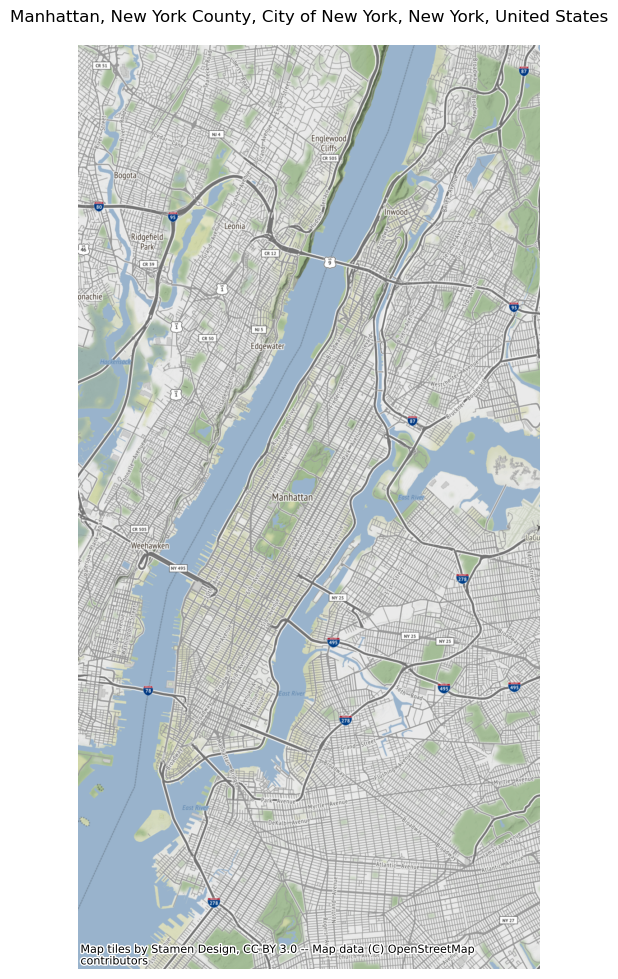

In [3]:
# Datos de visualización
NYC = contextily.Place("Manhattan, NY")

# Elementos de visualización
f = NYC.plot()

plt.show()

In [ ]:
# Reading in the boroughs data
boroughs = gpd.read_file(path + r"NYC Boroughs\nybb_22a\nybb.shp")
manhattan = boroughs[boroughs['BoroName']=='Manhattan']
manhattan = manhattan.to_crs('EPSG:4326')

In [ ]:
roads = gpd.read_file(path + r"New York Vector Data\road.geojson")
roads = roads.to_crs('EPSG:4326')
buildings = gpd.read_file(path + r"New York Vector Data\Building Footprints.geojson")
buildings = buildings.to_crs('EPSG:4326')

In [ ]:
# Reading in the NYC Neighborhoods from data file
nyc_n = gpd.read_file(os.path.join(path,r"NYC Neighborhoods\NYC_Neighborhoods.geojson"), driver='GeoJSON')
nyc_n = nyc_n[nyc_n['neighborhood'].isin(['Upper West Side','Upper East Side', 'Central Park'])]
nyc_n.head()

In [ ]:
nyc_n_dissolve = nyc_n.dissolve()
nyc_n_dissolve.head()

In [ ]:
roads_mask = roads.within(nyc_n_dissolve.loc[0,'geometry'])
buildings_mask = buildings.within(nyc_n_dissolve.loc[0,'geometry'])

roads_filtered = roads.loc[roads_mask]
buildings_filtered = buildings.loc[buildings_mask]

In [ ]:
buildings_filtered = buildings_filtered[buildings_filtered.geometry.type != 'Point']

In [ ]:
# Reading in data on popular NYC Attractions
nyc_attr = pd.read_csv(path + 'NYC Attractions\\NYC Attractions.csv')

# Convert PDF to GPDF
nyc_attr_gpdf =  gpd.GeoDataFrame(
    nyc_attr,
    geometry=gpd.points_from_xy(nyc_attr['Longitude'],
                                   nyc_attr['Latitude'],
                                   crs="EPSG:4326")
)

In [ ]:
attr_mask = nyc_attr_gpdf.within(nyc_n_dissolve.loc[0,'geometry'])
attr_filtered = nyc_attr_gpdf.loc[attr_mask]

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
   
# Plot choropleth of local statistics
nyc_attr_gpdf.plot(
    color='black',
    ax=ax
)

# Add basemap
contextily.add_basemap(
    ax,
    crs=nyc_attr_gpdf.crs,
    source=contextily.providers.OpenStreetMap.Mapnik,
)

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
   
# Plot choropleth of local statistics
attr_filtered.plot(
    color='black',
    ax=ax
)

roads_filtered.plot(
    color='blue',
    ax=ax
)

# Add basemap
contextily.add_basemap(
    ax,
    crs=nyc_attr_gpdf.crs,
    source=contextily.providers.OpenStreetMap.Mapnik,
    zoom=14
)

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
   
# Plot choropleth of local statistics
attr_filtered.plot(
    color='black',
    ax=ax
)

roads_filtered.plot(
    color='blue',
    ax=ax
)

buildings_filtered.plot(
    edgecolor='white', 
    linewidth=0.1, 
    alpha=0.75,
    ax=ax
)

# Add basemap
contextily.add_basemap(
    ax,
    crs=nyc_attr_gpdf.crs,
    source=contextily.providers.OpenStreetMap.Mapnik,
    zoom=14
)

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
   
# Plot choropleth of local statistics
nyc_n.plot(
    edgecolor='white', 
    linewidth=0.1, 
    alpha=0.75,
    color='lightgreen',
    ax=ax
)

attr_filtered.plot(
    color='black',
    ax=ax
)

roads_filtered.plot(
    color='blue',
    ax=ax
)

buildings_filtered.plot(
    edgecolor='white', 
    linewidth=0.1, 
    alpha=0.75,
    ax=ax
)



for idx, row in nyc_n.iterrows():
    plt.annotate(text=row['neighborhood'], xy=tuple([row.geometry.centroid.x, row.geometry.centroid.y]),
                 horizontalalignment='center',fontsize=15)


# Add basemap
contextily.add_basemap(
    ax,
    crs=nyc_attr_gpdf.crs,
    source=contextily.providers.OpenStreetMap.Mapnik,
    zoom=14
)

# Raster Data Examples

In [ ]:
import folium
import geopandas as gpd
from sentinelsat.sentinel import SentinelAPI
import rasterio 
import matplotlib.pyplot as plt
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask
from osgeo import gdal

In [ ]:
# Open Bands 4, 3 and 2 with Rasterio
bands = path + r'S2B_MSIL2A_20220504T161829_N0400_R040_T17TNF_20220504T210702.SAFE\\GRANULE\\L2A_T17TLF_A038218_20221016T162311\\IMG_DATA\\R20m\\'
b2 = rasterio.open(bands + 'T17TLF_20221016T162241_B02_20m.jp2')
b3 = rasterio.open(bands + 'T17TLF_20221016T162241_B03_20m.jp2')
b4 = rasterio.open(bands + 'T17TLF_20221016T162241_B04_20m.jp2')


# Create an RGB image 
with rasterio.open(path + 'RGB_2.tif','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

In [ ]:
bound_crs = boundary.to_crs('EPSG:32617')

with rasterio.open(path + 'RGB_2.tif') as src:
    out_image, out_transform = rasterio.mask.mask(src, bound_crs.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open(path + 'RGB_2_masked.tif', "w", **out_meta) as dest:
    dest.write(out_image)

In [ ]:
src = rasterio.open(path + 'RGB_2_masked.tif')
plt.figure(figsize=(6,6))
plt.title('Final Image')
plot.show(src, adjust='linear')

In [ ]:
# Read the grid values into numpy arrays
red = src.read(3)
green = src.read(2)
blue = src.read(1)

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

In [ ]:
# Create RGB natural color composite
rgb = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
plt.imshow(rgb)